In [51]:
#TUMOR CLASSIFICATION COMPUTER CODES
import keras
import tensorflow as tf
from keras.models import Sequential, Model, load_model
from tensorflow.keras.preprocessing import image
from keras.callbacks import TensorBoard 
from keras.utils.data_utils import get_file
from tensorflow.keras.applications import vgg16, vgg19, DenseNet121, ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import InceptionV3,MobileNetV3Large,MobileNetV3Small
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Input, Dropout, Activation, Flatten, BatchNormalization,ZeroPadding2D,concatenate,Lambda,GlobalAveragePooling2D
from keras.optimizers import Adam,SGD,RMSprop, Adadelta
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

import os
import random
import numpy as np
from scipy import io
import cv2 
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, confusion_matrix,classification_report 
from numpy import interp
from itertools import cycle
from tqdm import tqdm

#!rm /kaggle/working/
save_path="/kaggle/working/"
print(os.path.isdir(save_path))
if os.path.isdir(save_path)==True:
  print("directory exists")
else:
  os.mkdir(save_path)
  print("new directory was created")

True
directory exists


In [52]:
height=224
width=224

# train_ratio=0.6
# val_ratio=0.20
# test_ratio=0.20
class_number=4

#dataset_path="/kaggle/input/brain-data-7000/Brain_Tumor_dataset_7000"
train_dir = "/kaggle/input/brain-train-val-test-datasets/Dataset_7000/train"
val_dir ="/kaggle/input/brain-train-val-test-datasets/Dataset_7000/validation"
test_dir = "/kaggle/input/brain-train-val-test-datasets/Dataset_7000/test"



In [53]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm  # For progress bar

# Define the directory containing the images
train_dir = "/kaggle/input/brain-train-val-test-datasets/Dataset_7000/train"

# Define the classes (categories)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Create empty lists to store images and their corresponding labels
X_train = []  # List to store images
y_train = []  # List to store labels

# Loop through each class
for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(train_dir, class_name)

    # Loop through each image in the class directory
    for image_filename in tqdm(os.listdir(class_dir), desc=f"Reading {class_name}"):
        image_path = os.path.join(class_dir, image_filename)

        # Open the image and convert it to RGB mode
        img = Image.open(image_path).convert('RGB')

        # Resize the image to 224x224
        img = img.resize((224, 224))

        # Convert the image to a NumPy array and normalize pixel values
        img_array = np.array(img) / 255.0

        # Append the image and its label to the respective lists
        X_train.append(img_array)
        y_train.append(class_idx)

# Convert the lists to NumPy arrays for further processing
X_train = np.array(X_train)
y_train = np.array(y_train)

# Check the shapes of the arrays
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Reading pituitary: 100%|██████████| 1053/1053 [00:08<00:00, 125.89it/s]


X_train shape: (4212, 224, 224, 3)
y_train shape: (4212,)


In [54]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm  # For progress bar

# Define the directory containing the images
val_dir ="/kaggle/input/brain-train-val-test-datasets/Dataset_7000/validation"

# Define the classes (categories)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Create empty lists to store images and their corresponding labels
X_val= []  # List to store images
y_val = []  # List to store labels

# Loop through each class
for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(val_dir, class_name)

    # Loop through each image in the class directory
    for image_filename in tqdm(os.listdir(class_dir), desc=f"Reading {class_name}"):
        image_path = os.path.join(class_dir, image_filename)

        # Open the image and convert it to grayscale if needed
        img = Image.open(image_path).convert('RGB')  # Use 'L' mode for grayscale, or 'RGB' for color images

        # Resize the image if needed (e.g., to 224x224)
        img = img.resize((224, 224))

        # Convert the image to a NumPy array and normalize pixel values
        img_array = np.array(img) / 255.0

        # Append the image and its label to the respective lists
        X_val.append(img_array)
        y_val.append(class_idx)

# Convert the lists to NumPy arrays for further processing
X_val = np.array(X_val)
y_val = np.array(y_val)

# Check the shapes of the arrays
print("X_train shape:", X_val.shape)
print("y_train shape:", y_val.shape)


Reading pituitary: 100%|██████████| 352/352 [00:02<00:00, 125.42it/s]


X_train shape: (1405, 224, 224, 3)
y_train shape: (1405,)


In [55]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm  # For progress bar

# Define the directory containing the images
test_dir = "/kaggle/input/brain-train-val-test-datasets/Dataset_7000/test"

# Define the classes (categories)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Create empty lists to store images and their corresponding labels
X_test= []  # List to store images
y_test = []  # List to store labels

# Loop through each class
for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(test_dir, class_name)

    # Loop through each image in the class directory
    for image_filename in tqdm(os.listdir(class_dir), desc=f"Reading {class_name}"):
        image_path = os.path.join(class_dir, image_filename)

        # Open the image and convert it to grayscale if needed
        img = Image.open(image_path).convert('RGB') # Use 'L' mode for grayscale, or 'RGB' for color images

        # Resize the image if needed (e.g., to 224x224)
        img = img.resize((224, 224))

        # Convert the image to a NumPy array and normalize pixel values
        img_array = np.array(img) / 255.0

        # Append the image and its label to the respective lists
        X_test.append(img_array)
        y_test.append(class_idx)

# Convert the lists to NumPy arrays for further processing
X_test = np.array(X_test)
y_test = np.array(y_test)

# Check the shapes of the arrays
print("X_train shape:", X_test.shape)
print("y_train shape:", y_test.shape)


Reading pituitary: 100%|██████████| 352/352 [00:02<00:00, 128.39it/s]


X_train shape: (1406, 224, 224, 3)
y_train shape: (1406,)


In [56]:
y_train = keras.utils.to_categorical(y_train, class_number)
y_val = keras.utils.to_categorical(y_val, class_number)
y_test = keras.utils.to_categorical(y_test, class_number)

In [57]:
#Cross Correlation
EPOCHS=50
BATCH_SIZE=16
# x_fold=1
#optimizer=Adadelta(lr=0.1, rho=0.95, epsilon=1e-07, decay=0.0)

optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
#optimizer=SGD(lr=0.001, momentum=0.0, nesterov=False)
#optimizer=RMSprop(lr=0.0001, rho=0.9)

metric="accuracy" 
loss="categorical_crossentropy" 

model_checkpoint_callback = keras.callbacks.ModelCheckpoint("bestmodel.h5", save_best_only=True, save_weights_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, verbose=1, min_lr=2e-6)

# List of callbacks to be used during training
callbacks = [model_checkpoint_callback, early_stopping, reduce_lr]

In [24]:
from tensorflow.keras.applications import InceptionV3,VGG16
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D,Flatten, BatchNormalization,Dense,Dropout
from tensorflow.keras.layers import MaxPooling2D ,GlobalAveragePooling2D
input_shape = (height, width, 3)
base_model =InceptionV3(input_shape=input_shape,
                        weights = 'imagenet',
                        include_top=False)

for layer in base_model.layers[:10]:
    layer.trainable =False
  
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation ='relu')(x)
x=Dropout(0.4)(x)
predictions = Dense(class_number,activation="softmax")(x)

model1=Model(inputs =base_model.inputs,outputs =predictions)

In [25]:
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

    #train the model
history = model1.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks)


Epoch 1/50
264/264 [==============================] - 37s 106ms/step - loss: 0.3868 - accuracy: 0.8566 - val_loss: 0.1874 - val_accuracy: 0.9381 - lr: 1.0000e-04
Epoch 2/50
264/264 [==============================] - 23s 88ms/step - loss: 0.1306 - accuracy: 0.9575 - val_loss: 0.0759 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 3/50
264/264 [==============================] - 23s 86ms/step - loss: 0.0677 - accuracy: 0.9767 - val_loss: 0.1162 - val_accuracy: 0.9701 - lr: 1.0000e-04
Epoch 4/50
264/264 [==============================] - 23s 86ms/step - loss: 0.0713 - accuracy: 0.9765 - val_loss: 0.1437 - val_accuracy: 0.9516 - lr: 1.0000e-04
Epoch 5/50
264/264 [==============================] - 23s 88ms/step - loss: 0.0461 - accuracy: 0.9846 - val_loss: 0.0482 - val_accuracy: 0.9815 - lr: 1.0000e-04
Epoch 6/50
264/264 [==============================] - 23s 86ms/step - loss: 0.0757 - accuracy: 0.9772 - val_loss: 0.1339 - val_accuracy: 0.9687 - lr: 1.0000e-04
Epoch 7/50
264/264 [=============

In [26]:
save_path="/kaggle/working"
model1.save(os.path.join(save_path, "f3_InceptionV3.h5")) 
import os 
os.chdir(r'/kaggle/working')

from IPython.display import FileLink 
FileLink(r'f3_InceptionV3.h5')

/kaggle/working/f3_InceptionV3.h5

44/44 [==============================] - 5s 64ms/step

 
 Prediction Samples   
 
True Label: meningioma, Predicted Label: meningioma
True Label: meningioma, Predicted Label: meningioma
True Label: pituitary, Predicted Label: pituitary
True Label: glioma, Predicted Label: glioma
True Label: glioma, Predicted Label: glioma
True Label: meningioma, Predicted Label: meningioma
True Label: notumor, Predicted Label: notumor
True Label: glioma, Predicted Label: glioma
True Label: notumor, Predicted Label: notumor
True Label: meningioma, Predicted Label: meningioma
 
 Evaluate the model 

44/44 [==============================] - 2s 46ms/step - loss: 0.0253 - accuracy: 0.9915
[0.0013354407856240869, 0.9997625946998596]
[0.025281045585870743, 0.991465151309967]

 Accuracy Graph 
 


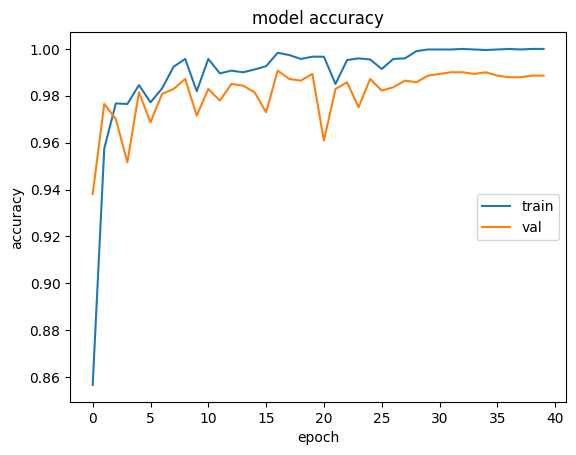

Loss Graph


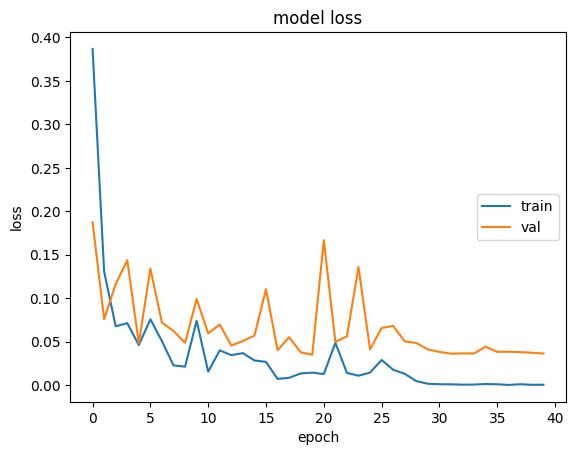

<Figure size 640x480 with 0 Axes>

In [27]:
# Make predictions
num_samples_to_display = 10 
y_pred = model1.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Randomly select a subset of samples to display
sample_indices = np.random.choice(len(y_test), num_samples_to_display, replace=False)

#Print a summary of predictions for the selected samples
print("\n \n Prediction Samples   \n ")
for j in sample_indices:
    true_label = classes[np.argmax(y_test[j])]
    predicted_label = classes[predicted_labels[j]]
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")




#Evaluate the model
print(" \n Evaluate the model \n")
train_score = model1.evaluate(X_train, y_train)
test_score = model1.evaluate(X_test, y_test)
print(train_score)
print(test_score)


#Plot accuracy 
#plt.close("all")
print("\n Accuracy Graph \n ")    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center right')
plt.show()
plt.savefig(os.path.join(save_path,"acc_"+".jpg"),dpi=150)


#Plot loss
#plt.close("all")
print("Loss Graph")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center right')
plt.show()
plt.savefig(os.path.join(save_path,"loss_"+".jpg"),dpi=150)

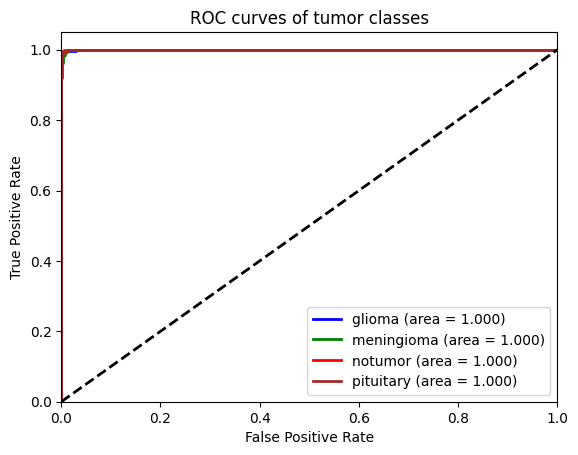

In [35]:
#def plot_roc():

# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(class_number):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_number)]))

# interpolate all ROC curves 
mean_tpr = np.zeros_like(all_fpr)
for i in range(class_number):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# compute AUC
mean_tpr /= class_number

# Plot all ROC curves
plt.close("all")
all_plt=plt.figure(1)

colors = cycle(["blue","green","red","brown"])
for i, color in zip(range(class_number), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (area = {1:0.3f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of tumor classes')
plt.legend(loc="lower right")
plt.show
all_plt.savefig(save_path+"all_auc_"+".jpg",dpi=150)

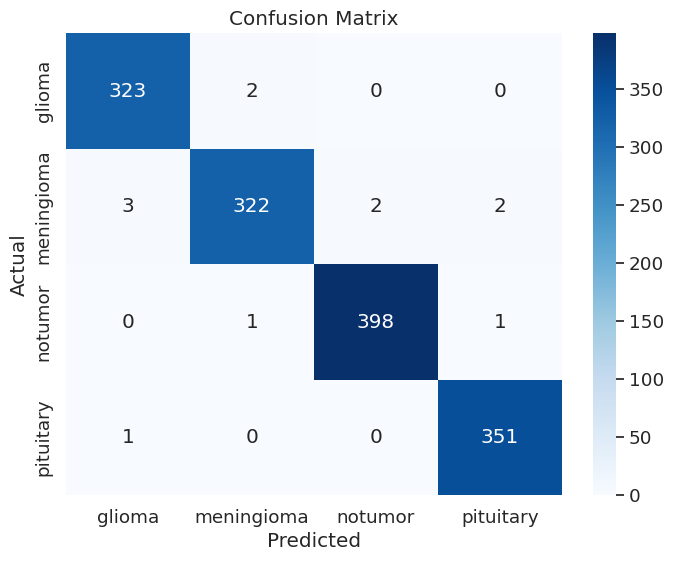

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cr = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=classes, output_dict=True)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(os.path.join(save_path, "confusion_matrix_" + ".png"))
plt.show()

Class: glioma
F1-Score: 0.99
Recall: 0.99
Precision: 0.99

Class: meningioma
F1-Score: 0.98
Recall: 0.98
Precision: 0.99

Class: notumor
F1-Score: 0.99
Recall: 0.99
Precision: 0.99

Class: pituitary
F1-Score: 0.99
Recall: 1.00
Precision: 0.99



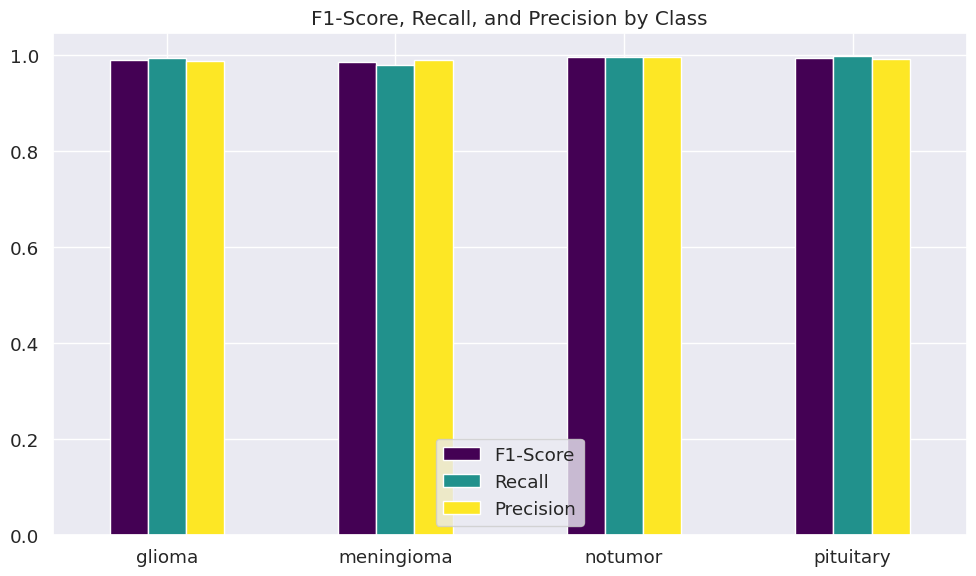

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you already have the 'matrix', 'cr', and 'classes' defined as in your code

# Extract the F1-score, recall, and precision values from the classification report
f1_scores = [cr[class_name]['f1-score'] for class_name in classes]
recalls = [cr[class_name]['recall'] for class_name in classes]
precisions = [cr[class_name]['precision'] for class_name in classes]

# Display F1-score, recall, and precision as numbers
for class_name, f1, recall, precision in zip(classes, f1_scores, recalls, precisions):
    print(f"Class: {class_name}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print("")

# Create a bar chart for F1-score, recall, and precision
metrics_df = pd.DataFrame({'F1-Score': f1_scores, 'Recall': recalls, 'Precision': precisions}, index=classes)
metrics_df.plot(kind='bar', figsize=(10, 6), cmap='viridis')
plt.title("F1-Score, Recall, and Precision by Class")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [38]:
input_shape = (height, width, 3)
base_model =VGG16(input_shape=input_shape,
                        weights = 'imagenet',
                        include_top=False)

for layer in base_model.layers[:10]:
    layer.trainable =False
  
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation ='relu')(x)
x=Dropout(0.3)(x)
predictions = Dense(class_number,activation="softmax")(x)

model2=Model(inputs =base_model.inputs,outputs =predictions)

In [39]:

optimizer=Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

    #train the model
history = model2.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks)


Epoch 1/50
264/264 [==============================] - 20s 73ms/step - loss: 0.5846 - accuracy: 0.7657 - val_loss: 0.9035 - val_accuracy: 0.6989 - lr: 1.0000e-04
Epoch 2/50
264/264 [==============================] - 18s 68ms/step - loss: 0.4103 - accuracy: 0.8668 - val_loss: 0.6170 - val_accuracy: 0.7765 - lr: 1.0000e-04
Epoch 3/50
264/264 [==============================] - 18s 68ms/step - loss: 0.3327 - accuracy: 0.8849 - val_loss: 0.6633 - val_accuracy: 0.7523 - lr: 1.0000e-04
Epoch 4/50
264/264 [==============================] - 18s 69ms/step - loss: 0.4953 - accuracy: 0.8421 - val_loss: 0.2533 - val_accuracy: 0.9160 - lr: 1.0000e-04
Epoch 5/50
264/264 [==============================] - 18s 69ms/step - loss: 0.2888 - accuracy: 0.9274 - val_loss: 0.3970 - val_accuracy: 0.8776 - lr: 1.0000e-04
Epoch 6/50
264/264 [==============================] - 18s 69ms/step - loss: 0.2945 - accuracy: 0.9214 - val_loss: 0.1812 - val_accuracy: 0.9445 - lr: 1.0000e-04
Epoch 7/50
264/264 [==============

In [42]:
save_path="/kaggle/working"
model2.save(os.path.join(save_path, "f3_Vgg16.h5")) 

In [43]:
import os 
os.chdir(r'/kaggle/working')

from IPython.display import FileLink 
FileLink(r'f3_Vgg16.h5')

/kaggle/working/f3_Vgg16.h5

44/44 [==============================] - 7s 109ms/step

 
 Prediction Samples   
 
True Label: glioma, Predicted Label: glioma
True Label: pituitary, Predicted Label: pituitary
True Label: meningioma, Predicted Label: meningioma
True Label: pituitary, Predicted Label: pituitary
True Label: notumor, Predicted Label: notumor
True Label: notumor, Predicted Label: notumor
True Label: glioma, Predicted Label: glioma
True Label: glioma, Predicted Label: glioma
True Label: pituitary, Predicted Label: pituitary
True Label: meningioma, Predicted Label: meningioma
 
 Evaluate the model 

44/44 [==============================] - 3s 67ms/step - loss: 0.0711 - accuracy: 0.9836
[0.02904910035431385, 0.9945394396781921]
[0.07111261785030365, 0.9836415648460388]

 Accuracy Graph 
 


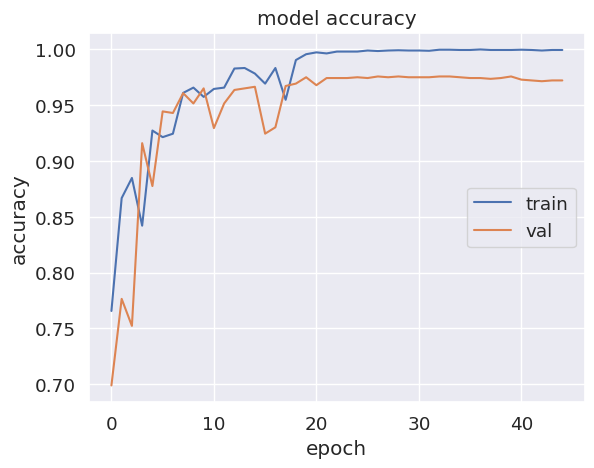

Loss Graph


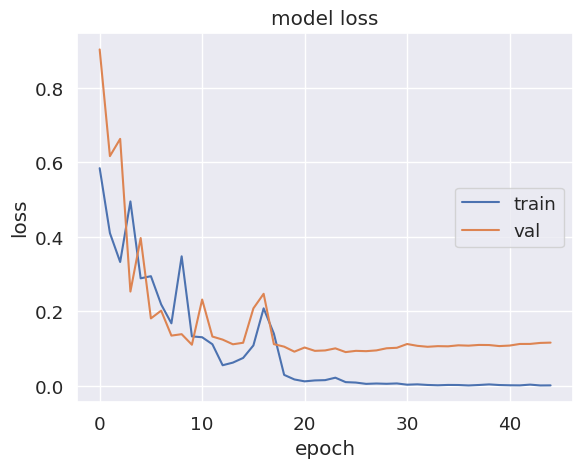

<Figure size 640x480 with 0 Axes>

In [44]:
# Make predictions
num_samples_to_display = 10 
y_pred = model2.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Randomly select a subset of samples to display
sample_indices = np.random.choice(len(y_test), num_samples_to_display, replace=False)

#Print a summary of predictions for the selected samples
print("\n \n Prediction Samples   \n ")
for j in sample_indices:
    true_label = classes[np.argmax(y_test[j])]
    predicted_label = classes[predicted_labels[j]]
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")




#Evaluate the model
print(" \n Evaluate the model \n")
train_score = model2.evaluate(X_train, y_train)
test_score = model2.evaluate(X_test, y_test)
print(train_score)
print(test_score)


#Plot accuracy 
#plt.close("all")
print("\n Accuracy Graph \n ")    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center right')
plt.show()
plt.savefig(os.path.join(save_path,"acc_"+".jpg"),dpi=150)


#Plot loss
#plt.close("all")
print("Loss Graph")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center right')
plt.show()
plt.savefig(os.path.join(save_path,"loss_"+".jpg"),dpi=150)

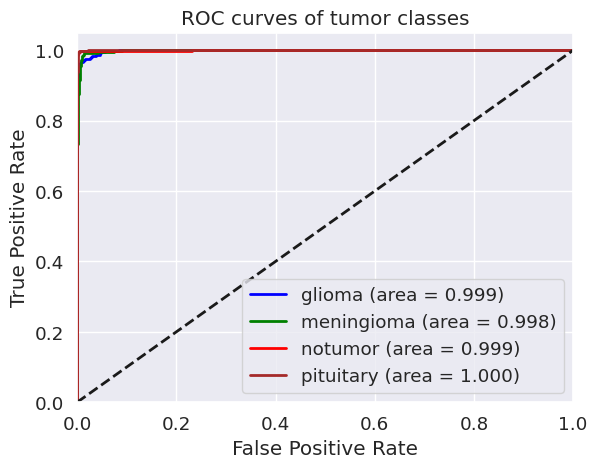

In [45]:
#def plot_roc():

# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(class_number):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_number)]))

# interpolate all ROC curves 
mean_tpr = np.zeros_like(all_fpr)
for i in range(class_number):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# compute AUC
mean_tpr /= class_number

# Plot all ROC curves
plt.close("all")
all_plt=plt.figure(1)

colors = cycle(["blue","green","red","brown"])
for i, color in zip(range(class_number), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (area = {1:0.3f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of tumor classes')
plt.legend(loc="lower right")
plt.show
all_plt.savefig(save_path+"all_auc_"+".jpg",dpi=150)

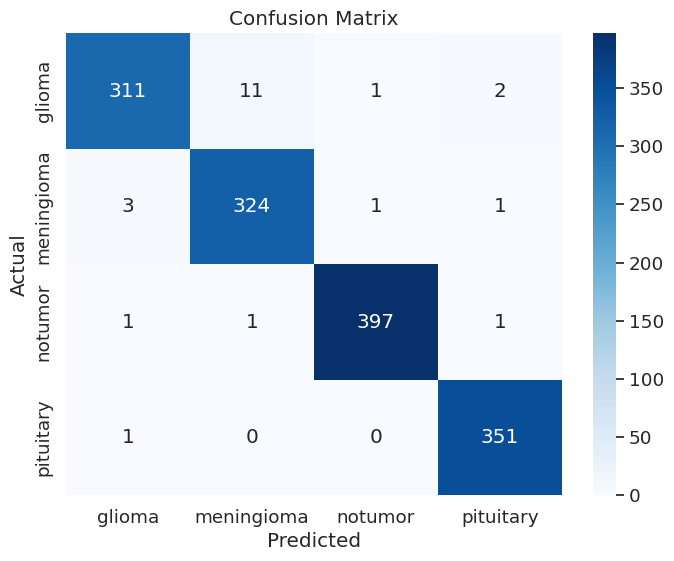

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cr = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=classes, output_dict=True)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(os.path.join(save_path, "confusion_matrix_" + ".png"))
plt.show()


Class: glioma
F1-Score: 0.97
Recall: 0.96
Precision: 0.98

Class: meningioma
F1-Score: 0.97
Recall: 0.98
Precision: 0.96

Class: notumor
F1-Score: 0.99
Recall: 0.99
Precision: 0.99

Class: pituitary
F1-Score: 0.99
Recall: 1.00
Precision: 0.99



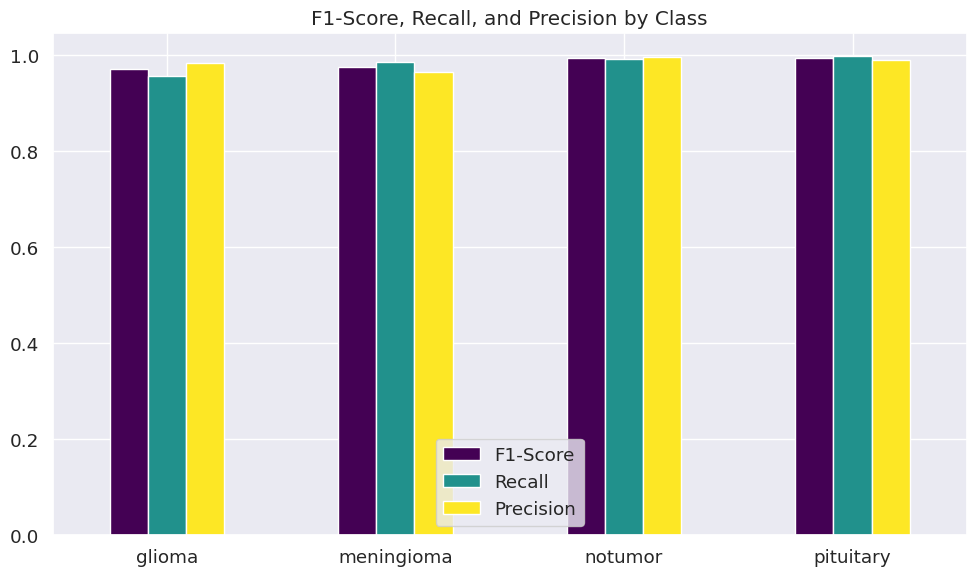

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you already have the 'matrix', 'cr', and 'classes' defined as in your code

# Extract the F1-score, recall, and precision values from the classification report
f1_scores = [cr[class_name]['f1-score'] for class_name in classes]
recalls = [cr[class_name]['recall'] for class_name in classes]
precisions = [cr[class_name]['precision'] for class_name in classes]

# Display F1-score, recall, and precision as numbers
for class_name, f1, recall, precision in zip(classes, f1_scores, recalls, precisions):
    print(f"Class: {class_name}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print("")

# Create a bar chart for F1-score, recall, and precision
metrics_df = pd.DataFrame({'F1-Score': f1_scores, 'Recall': recalls, 'Precision': precisions}, index=classes)
metrics_df.plot(kind='bar', figsize=(10, 6), cmap='viridis')
plt.title("F1-Score, Recall, and Precision by Class")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [50]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D,Flatten, BatchNormalization,Dense,Dropout
from tensorflow.keras.layers import MaxPooling2D ,GlobalAveragePooling2D
input_shape = (height, width, 3)
base_model =DenseNet121(input_shape=input_shape,
                        weights = 'imagenet',
                        include_top=False)

for layer in base_model.layers[:10]:
    layer.trainable =False
  
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation ='relu')(x)
x=Dropout(0.3)(x)
predictions = Dense(class_number,activation="softmax")(x)

model3=Model(inputs =base_model.inputs,outputs =predictions)

In [58]:
optimizer=Adadelta(lr=0.01, rho=0.95, epsilon=1e-07, decay=0.0)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

    #train the model
history = model3.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=callbacks)


/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adadelta.py:82: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
264/264 [==============================] - 51s 138ms/step - loss: 0.8199 - accuracy: 0.6826 - val_loss: 0.7071 - val_accuracy: 0.7281 - lr: 0.0100
Epoch 2/50
264/264 [==============================] - 30s 115ms/step - loss: 0.3432 - accuracy: 0.8834 - val_loss: 0.2909 - val_accuracy: 0.8854 - lr: 0.0100
Epoch 3/50
264/264 [==============================] - 30s 115ms/step - loss: 0.2314 - accuracy: 0.9236 - val_loss: 0.1464 - val_accuracy: 0.9502 - lr: 0.0100
Epoch 4/50
264/264 [==============================] - 30s 115ms/step - loss: 0.1701 - accuracy: 0.9444 - val_loss: 0.1226 - val_accuracy: 0.9559 - lr: 0.0100
Epoch 5/50
264/264 [==============================] - 30s 114ms/step - loss: 0.1318 - accuracy: 0.9589 - val_loss: 0.0935 - val_accuracy: 0.9658 - lr: 0.0100
Epoch 6/50
264/264 [==============================] - 30s 114ms/step - loss: 0.0896 - accuracy: 0.9751 - val_loss: 0.0784 - val_accuracy: 0.9772 - lr: 0.0100
Epoch 7/50
264/264 [==============================] 

In [59]:
save_path="/kaggle/working"
model3.save(os.path.join(save_path, "f3_DeneNet121.h5")) 

In [60]:
import os 
os.chdir(r'/kaggle/working')

from IPython.display import FileLink 
FileLink(r'f3_DeneNet121.h5')

/kaggle/working/f3_DeneNet121.h5

44/44 [==============================] - 2s 52ms/step

 
 Prediction Samples   
 
True Label: notumor, Predicted Label: notumor
True Label: notumor, Predicted Label: notumor
True Label: pituitary, Predicted Label: pituitary
True Label: notumor, Predicted Label: notumor
True Label: glioma, Predicted Label: glioma
True Label: notumor, Predicted Label: notumor
True Label: glioma, Predicted Label: glioma
True Label: meningioma, Predicted Label: meningioma
True Label: notumor, Predicted Label: notumor
True Label: meningioma, Predicted Label: meningioma
 
 Evaluate the model 

44/44 [==============================] - 2s 56ms/step - loss: 0.0345 - accuracy: 0.9836
[0.00013823938206769526, 1.0]
[0.03448908030986786, 0.9836415648460388]

 Accuracy Graph 
 


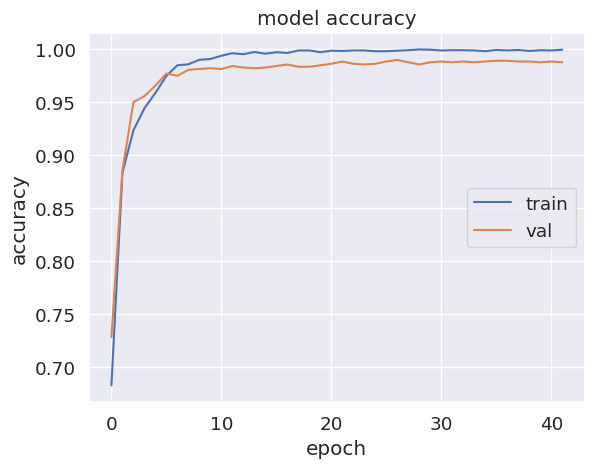

Loss Graph


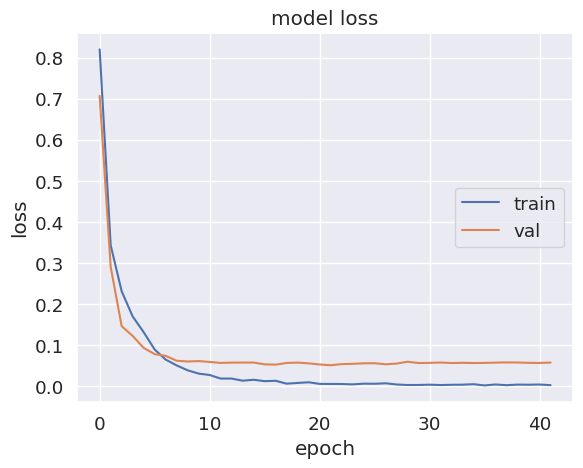

<Figure size 640x480 with 0 Axes>

In [65]:
# Make predictions
num_samples_to_display = 10 
y_pred = model3.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Randomly select a subset of samples to display
sample_indices = np.random.choice(len(y_test), num_samples_to_display, replace=False)

#Print a summary of predictions for the selected samples
print("\n \n Prediction Samples   \n ")
for j in sample_indices:
    true_label = classes[np.argmax(y_test[j])]
    predicted_label = classes[predicted_labels[j]]
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")




#Evaluate the model
print(" \n Evaluate the model \n")
train_score = model3.evaluate(X_train, y_train)
test_score = model3.evaluate(X_test, y_test)
print(train_score)
print(test_score)


#Plot accuracy 
#plt.close("all")
print("\n Accuracy Graph \n ")    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center right')
plt.show()
plt.savefig(os.path.join(save_path,"acc_"+".jpg"),dpi=150)


#Plot loss
#plt.close("all")
print("Loss Graph")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center right')
plt.show()
plt.savefig(os.path.join(save_path,"loss_"+".jpg"),dpi=150)

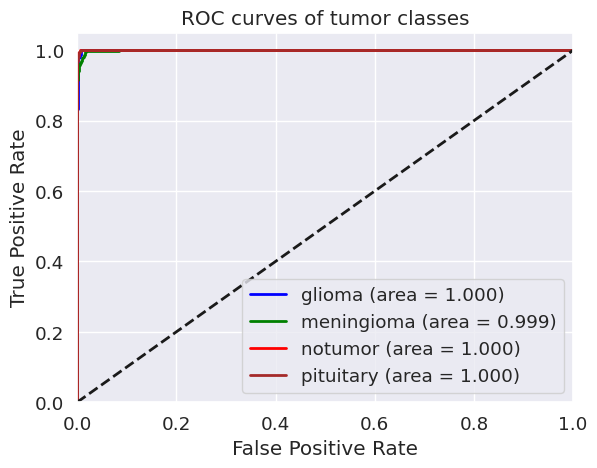

In [62]:
#def plot_roc():

# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(class_number):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_number)]))

# interpolate all ROC curves 
mean_tpr = np.zeros_like(all_fpr)
for i in range(class_number):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# compute AUC
mean_tpr /= class_number

# Plot all ROC curves
plt.close("all")
all_plt=plt.figure(1)

colors = cycle(["blue","green","red","brown"])
for i, color in zip(range(class_number), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (area = {1:0.3f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of tumor classes')
plt.legend(loc="lower right")
plt.show
all_plt.savefig(save_path+"all_auc_"+".jpg",dpi=150)

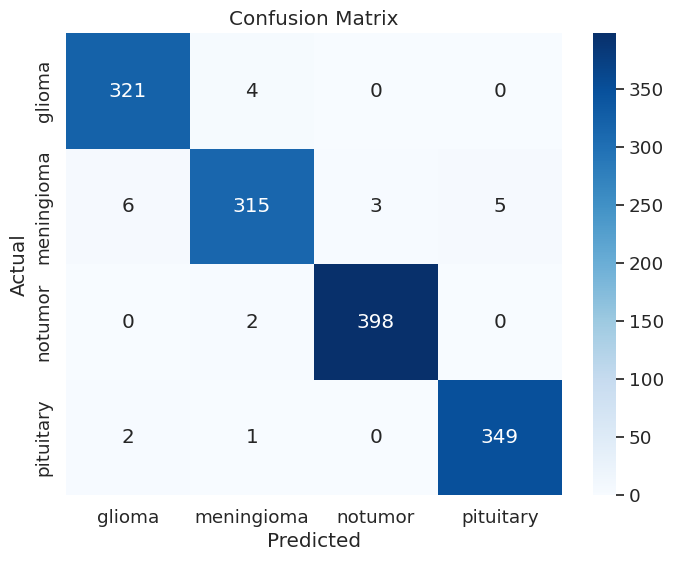

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cr = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=classes, output_dict=True)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(os.path.join(save_path, "confusion_matrix_" + ".png"))
plt.show()


Class: glioma
F1-Score: 0.98
Recall: 0.99
Precision: 0.98

Class: meningioma
F1-Score: 0.97
Recall: 0.96
Precision: 0.98

Class: notumor
F1-Score: 0.99
Recall: 0.99
Precision: 0.99

Class: pituitary
F1-Score: 0.99
Recall: 0.99
Precision: 0.99



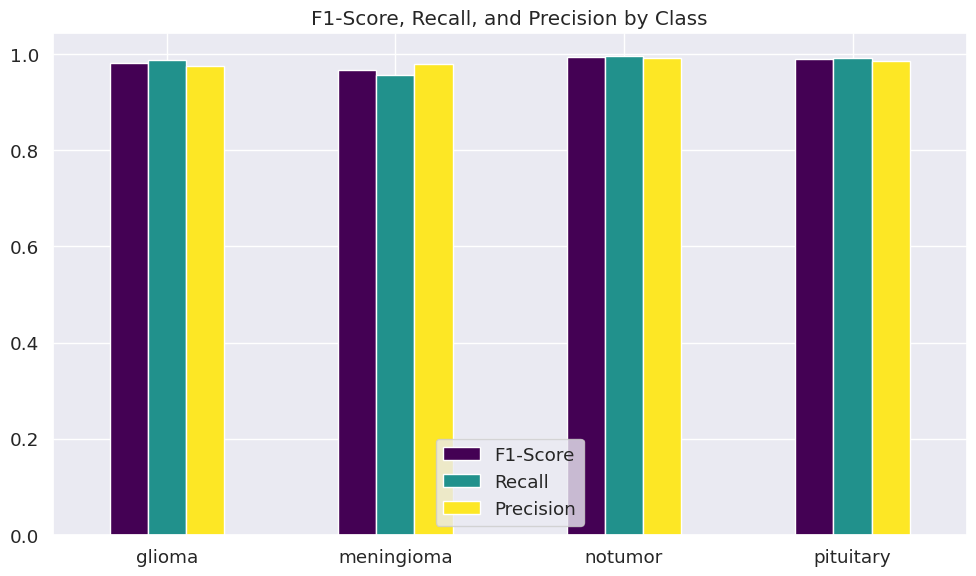

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you already have the 'matrix', 'cr', and 'classes' defined as in your code

# Extract the F1-score, recall, and precision values from the classification report
f1_scores = [cr[class_name]['f1-score'] for class_name in classes]
recalls = [cr[class_name]['recall'] for class_name in classes]
precisions = [cr[class_name]['precision'] for class_name in classes]

# Display F1-score, recall, and precision as numbers
for class_name, f1, recall, precision in zip(classes, f1_scores, recalls, precisions):
    print(f"Class: {class_name}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print("")

# Create a bar chart for F1-score, recall, and precision
metrics_df = pd.DataFrame({'F1-Score': f1_scores, 'Recall': recalls, 'Precision': precisions}, index=classes)
metrics_df.plot(kind='bar', figsize=(10, 6), cmap='viridis')
plt.title("F1-Score, Recall, and Precision by Class")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Average
from sklearn.metrics import accuracy_score
import numpy as np

model_1 =load_model("/kaggle/input/trained/InceptionV3.h5")
model_1 = Model(inputs = model_1.inputs,
               outputs = model_1.outputs,
               name = 'Inception')
model_2 =load_model("/kaggle/input/trained/Vgg16.h5")
model_2 = Model(inputs = model_2.inputs,
               outputs = model_2.outputs,
               name = 'vgg16')
model_3 =load_model("/kaggle/input/trained/DeneNet121.h5")
model_3 = Model(inputs = model_3.inputs,
               outputs = model_3.outputs,
               name = 'densenet121')


In [68]:
import numpy as np

# y_test is one-hot encoded ,change to integer classes
y_test_original = np.argmax(y_test, axis=1)


In [69]:
googlenet = model_1.predict(X_test)
googlenet_predicted_classes = googlenet.argmax(axis=-1)

vggnet = model_2.predict(X_test)
vggnet_predicted_classes = vggnet.argmax(axis=-1)

densenet = model_3.predict(X_test)
densenet_predicted_classes = densenet.argmax(axis=-1)


44/44 [==============================] - 4s 45ms/step


In [76]:
from sklearn.metrics import accuracy_score

dense_accuracy = accuracy_score(y_test_original,densenet_predicted_classes)
densenet_accuracy_percentage = dense_accuracy * 100
print(f'DenseNet121_Accuracy: {densenet_accuracy_percentage:.2f}%')

google_accuracy = accuracy_score(y_test_original,googlenet_predicted_classes)
googlenet_accuracy_percentage = google_accuracy * 100
print(f'GoogleNet_Accuracy: {googlenet_accuracy_percentage:.2f}%')

vgg16_accuracy = accuracy_score(y_test_original,vggnet_predicted_classes)
vggnet_accuracy_percentage = vgg16_accuracy * 100
print(f'Vgg16_Accuracy: {vggnet_accuracy_percentage :.2f}%')

DenseNet121_Accuracy: 98.36%
GoogleNet_Accuracy: 99.15%
Vgg16_Accuracy: 98.36%


In [89]:
googleNet_weight = 0.5
denseNet_weight = 0.25
vggNet_weight = 0.25

In [90]:
# Combine the predictions of the base models using weighted average voting
ensemble_predictions = (googlenet*googleNet_weight+ vggnet*vggNet_weight +densenet*denseNet_weight) / 3
ensemble_predictions_classses=ensemble_predictions.argmax(axis=-1)


ensemble_accuracy = accuracy_score(y_test_original,ensemble_predictions_classses)
accuracy_percentage = ensemble_accuracy * 100
print(f'Ensemble_Accuracy: {accuracy_percentage:.2f}%')


Ensemble_Accuracy: 99.43%


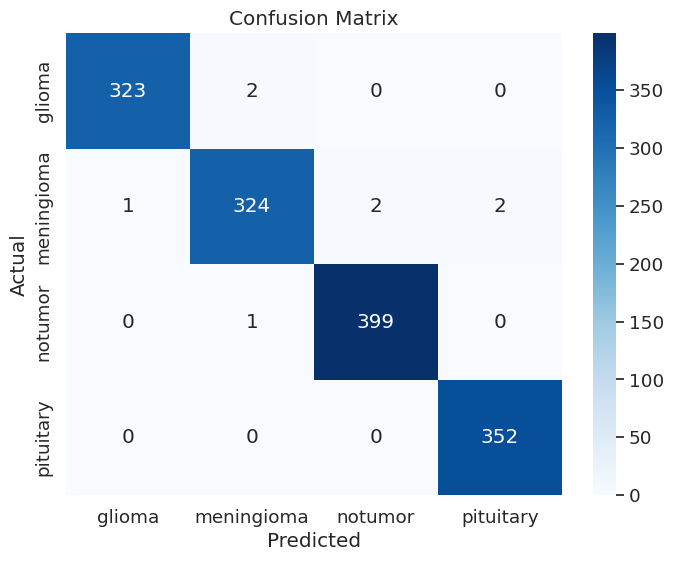

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


matrix = confusion_matrix(y_test_original,ensemble_predictions_classses)
cr = classification_report(y_test_original, ensemble_predictions_classses, target_names=classes, output_dict=True)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(os.path.join(save_path, "confusion_matrix_" + ".png"))
plt.show()


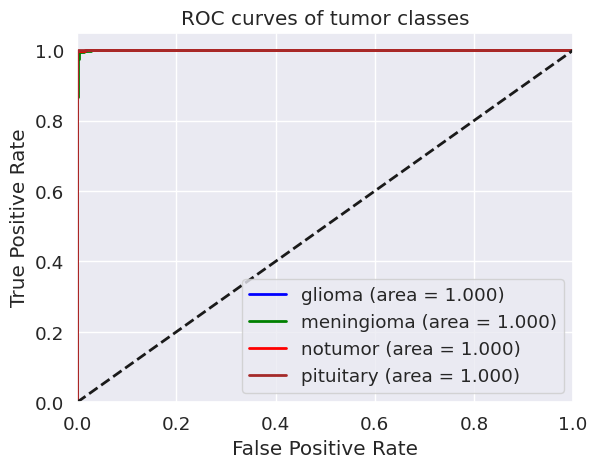

In [92]:
#def plot_roc():

# Plot linewidth.
lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(class_number):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], ensemble_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(class_number)]))

# interpolate all ROC curves 
mean_tpr = np.zeros_like(all_fpr)
for i in range(class_number):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# compute AUC
mean_tpr /= class_number

# Plot all ROC curves
plt.close("all")
all_plt=plt.figure(1)

colors = cycle(["blue","green","red","brown"])
for i, color in zip(range(class_number), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (area = {1:0.3f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of tumor classes')
plt.legend(loc="lower right")
plt.show
all_plt.savefig(save_path+"all_auc_"+".jpg",dpi=150)

Class: glioma
F1-Score: 1.00
Recall: 0.99
Precision: 1.00

Class: meningioma
F1-Score: 0.99
Recall: 0.98
Precision: 0.99

Class: notumor
F1-Score: 1.00
Recall: 1.00
Precision: 1.00

Class: pituitary
F1-Score: 1.00
Recall: 1.00
Precision: 0.99



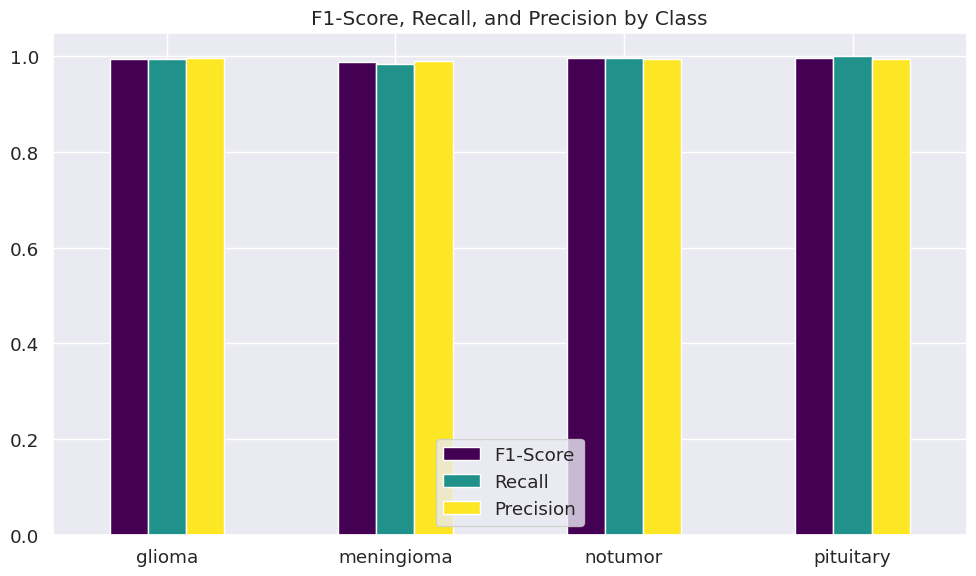

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Extract the F1-score, recall, and precision values from the classification report
f1_scores = [cr[class_name]['f1-score'] for class_name in classes]
recalls = [cr[class_name]['recall'] for class_name in classes]
precisions = [cr[class_name]['precision'] for class_name in classes]

# Display F1-score, recall, and precision as numbers
for class_name, f1, recall, precision in zip(classes, f1_scores, recalls, precisions):
    print(f"Class: {class_name}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print("")

# Create a bar chart for F1-score, recall, and precision
metrics_df = pd.DataFrame({'F1-Score': f1_scores, 'Recall': recalls, 'Precision': precisions}, index=classes)
metrics_df.plot(kind='bar', figsize=(10, 6), cmap='viridis')
plt.title("F1-Score, Recall, and Precision by Class")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
